# Overview

This notebook will apply EOF analysis to regridded V20 SSH data via a Jupyter Notebook using ferretmagic.  Many thanks to Patrick Brockmann and the [ferretmagic documentation](https://github.com/PBrockmann/C-CASCADES_notebooks/blob/master/ferretBasics.ipynb) for providing an excellent starting point!  Also thanks to the Ferret Development Team for their [EOF example](https://ferret.pmel.noaa.gov/Ferret/documentation/ferret-eof-demo).  More details on the EOFSVD code are [here](https://ferret.pmel.noaa.gov/Ferret/documentation/users-guide/appendix-a-external-functions/EOF-SPACE#_eofsvd_space).  First we start ferretmagic, load the data into PyFerret, and compute the EOF.  Then, we plot the first few EOF/PC pairings and offer some initial interpretation.

This _annual version is for making a quick test of the impact of removing the seasonal cycle.

# Some thoughts on computational resources

With 1 degree, monthly data, 1958-2009, we're using about 1.5GB RAM (.9GB app + 0.6GB baseline), runs in a few minutes.  Going to 0.5 degree, we'd quadruple the data (double in each x,y direction) => 0.9 x 4 = 3.6GB + 0.6GB estimate.  Going to 0.25 degree, quadruple again => 3.6 x 4 = 14.4GB + 0.6.  That doesn't count container baseline RAM.

In [1]:
import sys
sys.path.append('/mnt/local/pyferret/lib/python3.6/site-packages')
import pyferret
pyferret.addenv(FER_DIR='/mnt/local/pyferret', FER_DAT='/mnt/local/FerretDatasets')
pyferret.start(journal=False, quiet=True, unmapped=True)
%load_ext ferretmagic

In [2]:
%%ferret

cancel data/all
use /home/sgary/data/na100/V20_1958_2009_SSH_regridded_annual.nc
set memory /size=2000
show data


currently SET data sets:
 1> /home/sgary/data/na100/V20_1958_2009_SSH_regridded_annual.nc (default)
 name title I J K L
 TIME ... ... ... 1:52
 (invalid coordinate axis)
 SSH 1:89 1:85 ... 1:52
 GLAMT 1:89 1:85 ... ...
 GPHIT 1:89 1:85 ... ...

# Sample plot of data

! Enter_GO land
! Exit_GO


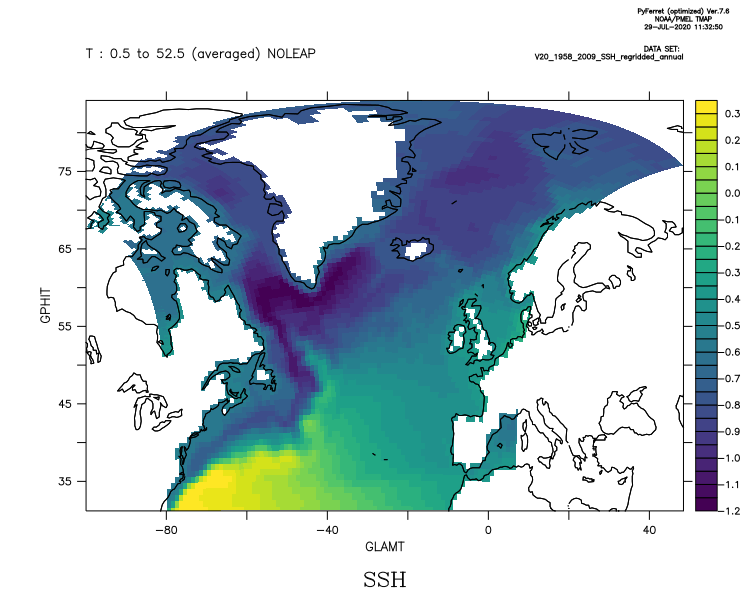

In [3]:
%%ferret
shade ssh[d=1,l=@AVE],glamt[d=1],gphit[d=1]; go land

# Run EOF

In [4]:
%%ferret
let ssh_anom = ssh[d=1]-ssh[d=1,l=@AVE]
let eof_time = eofsvd_tfunc(ssh_anom)
save /clobber /file=eof_time_annual.nc eof_time


In [5]:
%%ferret
let eof_space = eofsvd_space(ssh_anom)
save /clobber /file=eof_space_annual.nc eof_space


In [6]:
%%ferret
let eof_stat = eofsvd_stat(ssh_anom)
save /clobber /file=eof_stat_annual.nc eof_stat


In [8]:
%%ferret
use /home/sgary/data/na100/eof_time_annual.nc
use /home/sgary/data/na100/eof_space_annual.nc
use /home/sgary/data/na100/eof_stat_annual.nc
sh d

currently SET data sets:
 1> /home/sgary/data/na100/V20_1958_2009_SSH_regridded_annual.nc
 name title I J K L
 TIME ... ... ... 1:52
 (invalid coordinate axis)
 SSH 1:89 1:85 ... 1:52
 GLAMT 1:89 1:85 ... ...
 GPHIT 1:89 1:85 ... ...
 
 2> /home/sgary/data/na100/eof_time_annual.nc
 name title I J K L
 TIME ... ... ... 1:52
 (invalid coordinate axis)
 EOF_TIME EOFSVD_TFUNC(SSH_ANOM) 1:7565 ... ... 1:52
 (T=0.5:52.5)
 
 3> /home/sgary/data/na100/eof_space_annual.nc
 name title I J K L
 EOF_SPACE
 EOFSVD_SPACE(SSH_ANOM) 1:89 1:85 ... 1:7565
 
 4> /home/sgary/data/na100/eof_stat_annual.nc (default)
 name title I J K L
 EOF_STAT EOFSVD_STAT(SSH_ANOM) 1:7565 1:3 ... ...

In [9]:
%%ferret
! List the percent variance explained for each EOF
list eof_stat[d=4,i=1:10,j=2]


VARIABLE : EOFSVD_STAT(SSH_ANOM)
 SUBSET : 10 points (X)
 Y : 2
 2 
 2
 1 / 1: 16.71
 2 / 2: 11.30
 3 / 3: 7.49
 4 / 4: 6.02
 5 / 5: 4.85
 6 / 6: 3.92
 7 / 7: 3.51
 8 / 8: 2.82
 9 / 9: 2.45
 10 / 10: 2.35

# Initial thoughts and interpretation

1. EOF 1 -> 17% of the variability, strong pole in the Subtropical Gyre, relatively weak signal in the Subpolar Gyre (fewer contour lines in SPG than STG).  This may be a signal of lower latitude heat content (LEFT panel in plot, BLACK line in time series).

2. EOF 2 -> 11% of the variability, conforms to the basic spatial and temporal patterns of the subpolar gyre index of Hakkinen & Rhines (2004) and Hatun et al. (2005).  HR05's SPG EOF also explained 11% of the variance (their Fig. 1) (RIGHT panel in plot, RED line in time series.)  For comparisons with Hatun et al. (2005, their Fig. 2), note that they use an inverted axis.  So the ~1990 high here corresponds to their ~1994 low and the ~1974 local maximum corresponds to their ~1975 low.

I included EOF's 3 and 4 further below for context.  One could speculate their meanings (e.g. EOF3 as the intergyre-gyre?! EOF4 as large scale patterns of AMOC-related heat transport?!) but it's still speculation.

! Enter_GO fland
! Exit_GO
! Enter_GO fland
! Exit_GO
! Enter_GO fland
! Exit_GO
! Enter_GO fland
! Exit_GO


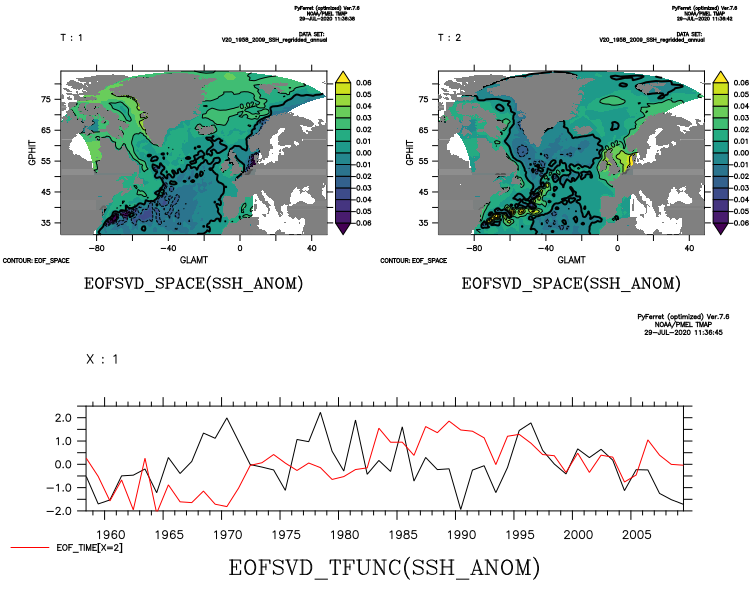

In [10]:
%%ferret
define axis/t=15-jun-1958:15-jun-2009:1/units=years `eof_time[d=2],return=taxis`
set view ul
fill /levels=(-inf)(-0.06,0.06,0.01)(inf) eof_space[d=3,l=1],glamt[d=1],gphit[d=1]; go fland
contour /over /color=1 /levels=(-0.1,0.1,0.02) eof_space[d=3,l=1],glamt[d=1],gphit[d=1]; go fland
set view ur
fill /levels=(-inf)(-0.06,0.06,0.01)(inf) eof_space[d=3,l=2],glamt[d=1],gphit[d=1]; go fland
contour /over /color=1 /levels=(-0.1,0.1,0.02) eof_space[d=3,l=2],glamt[d=1],gphit[d=1]; go fland
set view lower
plot eof_time[d=2,i=1]
plot /over /color=2 eof_time[d=2,i=2]


! Enter_GO fland
! Exit_GO
! Enter_GO fland
! Exit_GO
! Enter_GO fland
! Exit_GO
! Enter_GO fland
! Exit_GO


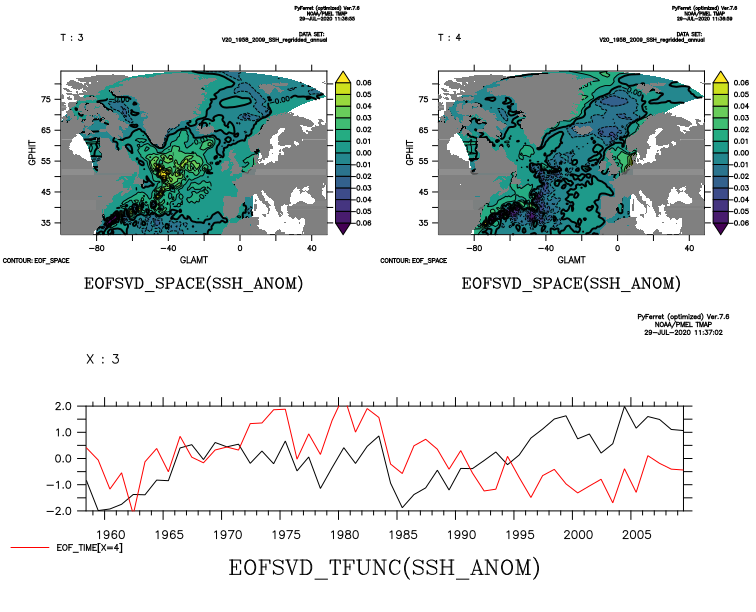

In [11]:
%%ferret
set view ul
fill /levels=(-inf)(-0.06,0.06,0.01)(inf) eof_space[d=3,l=3],glamt[d=1],gphit[d=1]; go fland
contour /over /color=1 /levels=(-0.1,0.1,0.01) eof_space[d=3,l=3],glamt[d=1],gphit[d=1]; go fland
set view ur
fill /levels=(-inf)(-0.06,0.06,0.01)(inf) eof_space[d=3,l=4],glamt[d=1],gphit[d=1]; go fland
contour /over /color=1 /levels=(-0.1,0.1,0.01) eof_space[d=3,l=4],glamt[d=1],gphit[d=1]; go fland
set view lower
plot eof_time[d=2,i=3]
plot /over /color=2 eof_time[d=2,i=4]

# Next steps

1. There's a long term drift in VIKING20 SSH.  Do we first edit that out?
2. Tests at higher resolution.